## 2.1 Limpieza de Datos

In [1]:
import pandas as pd                     # Importar paquetes
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/titanic.csv')  # Carga de datos
#df.sample(3)                            # Información básica del dataset, la selección de la muestra es aleatoria

# Veamos ahora las dimensiones de nuestros conjuntos de datos:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 

df.info()                               # Conjunto de entrenamiento

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Análisis de Valores Faltantes.
> Tengo el conjunto de datos df. Escribe el código de python para crear un mapa de calor utilizando seaborn que muestre un mapa de calor para este dataset. El mapa de calor debe mostrar los valores nulos del dataframe

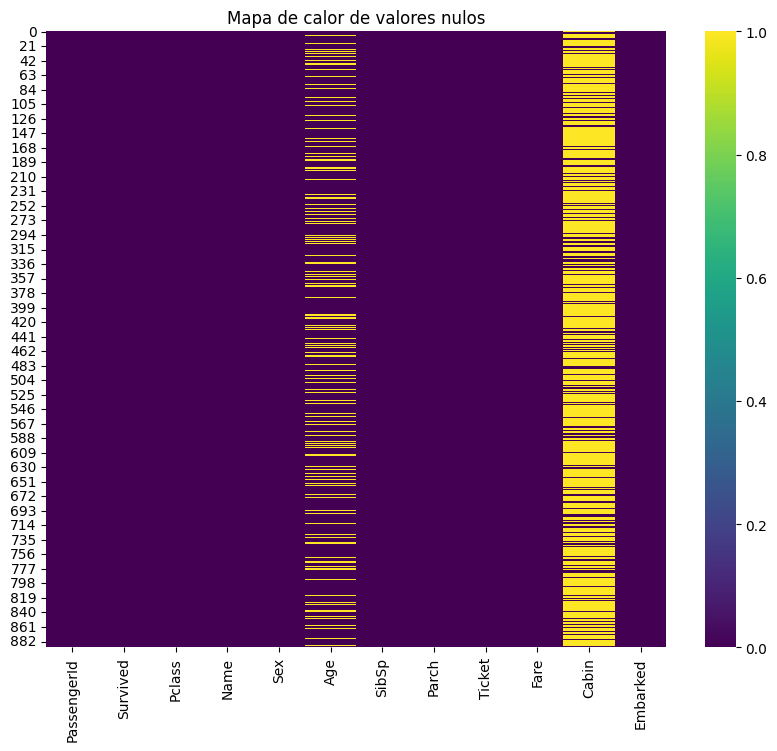

In [2]:
# Crear mapa de calor de valores nulos
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

> Tengo un DataFrame df. Esribe el código que me muestre el porcentaje de valores faltantes de cada columna del conjunto de datos df. Redondea a 2 decimales. Ordena los valores de mayor a menor.

In [3]:
# Calcular porcentaje de valores faltantes por columna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Redondear a 2 decimales y ordenar de mayor a menor
missing_percentage = missing_percentage.round(2).sort_values(ascending=False)

print(missing_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


> Deseamos crear una gráfica de barras usando seaborn que nos muestre el total de valores faltantes en cada columna del conjunto de datos df. 

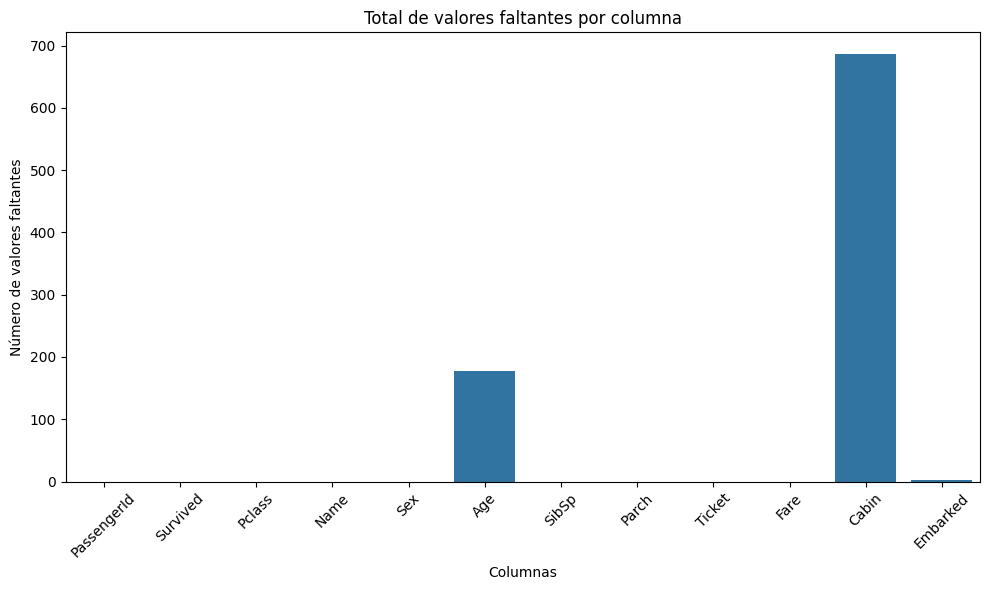

In [4]:
# Calcular total de valores faltantes por columna
missing_values = df.isnull().sum()

# Crear gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Total de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores faltantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Corregir valores faltantes en `df`

Ahora tomaremos una decisión importante. Nuestro conjunto de entrenamiento tiene muchos datos faltantes en la columna `Cabin`, y uno que otro en `Age`.

#### Columna `Cabin`
Dado que no tenemos la gran mayoría de los datos de `Cabin` nos conviene mejor deshacernos de esta columna. 

In [5]:
df.drop('Cabin', axis = 1, inplace = True)

En el contexto del método `drop()` de pandas, el argumento `axis=1` especifica que se eliminará una **columna** (axis=1 se refiere a las columnas, mientras que axis=0 se refiere a las filas), y `inplace=True` indica que la modificación se realizará **directamente sobre el DataFrame original** sin necesidad de asignar el resultado a una nueva variable. Sin `inplace=True`, tendrías que escribir `df = df.drop('Cabin', axis=1)` para guardar los cambios, pero con `inplace=True` el DataFrame `df` se modifica automáticamente y la columna 'Cabin' se elimina permanentemente de él.

#### Columna `Age`
Para esta columna tomaremos una decisión diferente. Realmente no queremos deshacernos de la edad porque será de suma importancia para nuestro modelo predictivo.

> Mi conjunto de datos df tiene el 78.23% de los datos de la columna Cabin en nulo, y 20.57% de la columna Age. He decidido eliminar la columna Cabin, pero no quiero eliminar la columna Age porque será importante para mi modelo. Cuál puede ser una estrategia muy simple para no tener valores en nulo en esta columna sin tener que eliminar las filas que los contienen? Escribe una respuesta corta y el código.

In [6]:
# Rellenar valores nulos de la columna Age con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\mel_f\AppData\Local\Temp\ipykernel_42276\1539876663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


De nuestras clases de Probabilidad y Estadística sabemos que la media tiene una pequeña desventaja:

>¡La media es sensible a valores atípicos!

Elegir entre la media y la mediana para imputar valores faltantes depende de la distribución de los datos en la columna Age.

Media: Es apropiada si la distribución de los datos es simétrica y no contiene valores atípicos (outliers). La media puede ser afectada por valores extremadamente altos o bajos, lo que podría sesgar el valor imputado.

Mediana: Es más robusta frente a valores atípicos y es una mejor opción si la distribución de los datos es asimétrica o contiene outliers. La mediana no se ve afectada por valores extremos, por lo que proporciona una representación más precisa del centro de la distribución en estos casos.

Para una imputación más robusta, es recomendable usar la mediana si la columna Age tiene outliers o una distribución sesgada.

Columna `Embarked`
**¿Qué hay de la columa Embarked?**
Recordemos que esta columna contiene el puerto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton). Realmente tenemos muy pocos valores nulos en esta columna (únicamente el 0.22%).

Preguntando a ChatGPT, vemos que una buena estrategia para esta columna es imputar los valores de la moda. 

In [7]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Si vemos ahora los porcentajes de valores nulos, veremos que ya estamos en ceros:

In [8]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

En lugar de ver porcentajes, también podemos ver el total en cada columna:

In [9]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Valores duplicados
Verifiquemos rápidamente si nuestros datasets tienen datos duplicados (filas repetidas).

In [10]:
df.duplicated().sum()

np.int64(0)

**No tenemos duplicados**

### Eliminar variables no útiles
¿Cuáles de nuestras columnas dirías que no nos serán útiles para predecir si un pasajero sobrevive o no? Puedes consultarlo con ChatGPT 😎
> Para el dataset del Titanic, las columnas que típicamente **no son útiles** para predecir supervivencia son:
>
>- **PassengerId**: Es solo un identificador único, no tiene relación con la supervivencia
>- **Name**: Los nombres individuales no aportan información predictiva (aunque podrían extraerse títulos como Mr., Mrs., etc.)
>- **Ticket**: Números de ticket son identificadores sin valor predictivo directo
>
>Las columnas **más útiles** para predecir supervivencia suelen ser:
>- **Pclass** (clase del pasajero)
>- **Sex** (género)
>- **Age** (edad)
>- **SibSp** y **Parch** (familiares a bordo)
>- **Fare** (tarifa pagada)
>- **Embarked** (puerto de embarque)
>
>Las variables como clase, género y edad tienen correlaciones históricas conocidas con las tasas de supervivencia del Titanic (protocolo "mujeres y niños primero", pasajeros de primera clase con mejor acceso a botes salvavidas, etc.).

Decidimos eliminar las columnas `Name`, `Ticket`, `PassengerId`.

In [11]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


#### Guardar datos limpios

Para no haer nuestros notebooks demasiado grandes, haremos un checkpoint aquí. Guarda estos conjuntos de datos en el directorio ./data/.

In [12]:
df.to_csv('./data/titanic_clean.csv', index=False)

Ahora, continuemos al siguiente notebook `2_EDA.ipynb`